In [3]:
from pandas import read_csv
import numpy as np
import pandas as pd
#get Eth dataset
eth_dataset=read_csv('eth.csv', index_col=False)

#get Rep dataset
dataset=read_csv('rep.csv', index_col=False)

In [4]:
#Function to add a prefix to all column headings
def rename_columns(prefix, dataset):
    for heading in (dataset.columns):
        dataset.rename(columns = {heading : (prefix + '_' + heading)},inplace=True)

#Rename Eth dataset columns to 'eth_'... 
rename_columns('eth', eth_dataset)

In [6]:
#Fill NA with 0's
dataset.fillna(0, inplace=True)

In [7]:
#Function to get the row full data starts
def get_shortest_feature(dataset):
    lenghts = []
    for col in ['txVolume(USD)', 'txCount', 'marketcap(USD)', 'price(USD)',
           'exchangeVolume(USD)', 'activeAddresses', 'medianTxValue(USD)']:
        lenghts.append(len(dataset[dataset[col] >0]))
    return min(lenghts)

In [8]:
#Count number of valid records in dataset, (txCount=0 is a proxy for invalid)
valid_record_count = len(dataset) - get_shortest_feature(dataset)

#remove incomplete rows
sliced_data = dataset.iloc[valid_record_count:]

In [9]:
from matplotlib import pyplot

def get_float_headings_list(dataset):
    float_headings = []
    float_columns = dataset.loc[:0, dataset.dtypes == float].columns
    for index, heading in enumerate(float_columns):
        float_headings.append(dataset.columns.get_loc(float_columns[index]))
    return float_headings

def plot_timeseries_graphs(dataset, name=''):
    values = dataset.values
    # specify columns to plot
    groups = get_float_headings_list(dataset)
    i = 1
    # plot each column
    pyplot.figure()
    for group in groups:
        pyplot.subplot(len(groups), 1, i)
        pyplot.plot(values[:, group])
        pyplot.title(name + ' ' + dataset.columns[group], y=0.5, loc='right')
        i += 1
    pyplot.show()
    


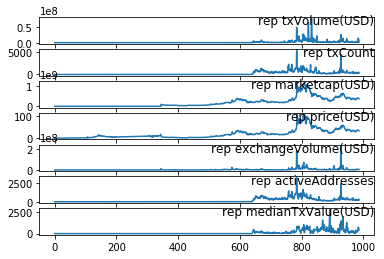

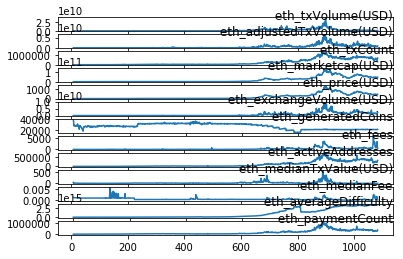

In [10]:
#plot REP & ETH time series data
plot_timeseries_graphs(dataset,'rep')
plot_timeseries_graphs(eth_dataset)

In [11]:
#function to slice a base dataset based to match with the dates of a dataset to be analyzed
def slice_base_asset_data(base_dataset, sliced_dataset, date_column_name='date'):
    valid_dates = sliced_dataset['date'].values
    sliced_base_data = base_dataset.loc[base_dataset['eth_date'].isin(valid_dates)]
    return sliced_base_data

#Slice ETH data to match dates with REP
sliced_eth_data = slice_base_asset_data(eth_dataset,sliced_data,'eth_date')

#sanity check sliced datasets are the same shape
print('sliced ETH data shape {}'.format(sliced_eth_data.shape))
print('sliced REP data shape {}'.format(sliced_data.shape))

sliced ETH data shape (346, 16)
sliced REP data shape (346, 8)


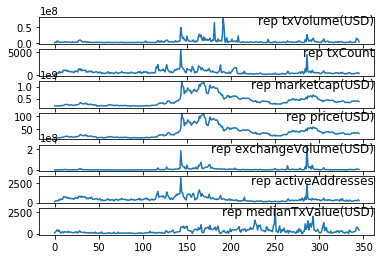

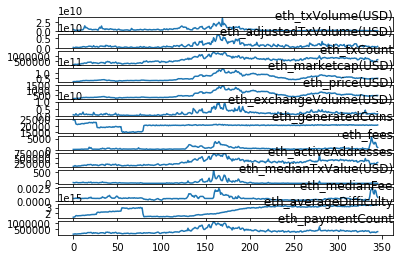

In [12]:
#plot sliced REP & ETH time series data
plot_timeseries_graphs(sliced_data, 'rep')
plot_timeseries_graphs(sliced_eth_data)

## Describe the above data

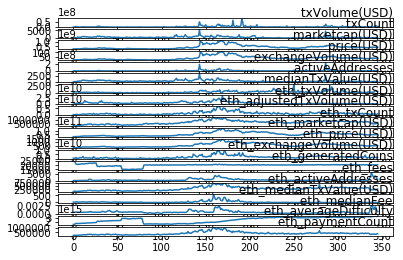

In [13]:
#Function to merge two datasets by date
def merge_frames(dataset, base_dataset, dataset_column_name='date', base_dataset_column_name='eth_date'):
    x =pd.merge(dataset.rename(columns={dataset_column_name:'date'}), 
                base_dataset.rename(columns={base_dataset_column_name:'date'}), 
                on='date', how='left')
    return x
#Join the sliced REP data & ETH data on date
merged_data = merge_frames(sliced_data,eth_dataset)

#Plot Graphs
plot_timeseries_graphs(merged_data)



In [14]:
#Sanity Check for missing values
print('NaN Cells: {}'.format(merged_data.isnull().values.sum()))

#Sanity Check for 0 values
print('Cells With a 0: {}'.format(merged_data.isin([0]).sum().sum()))
merged_data

NaN Cells: 0
Cells With a 0: 51


date  txVolume(USD)  txCount  marketcap(USD)  price(USD)  \
0    2017-07-29   8.489951e+04    111.0     188854000.0       17.17   
1    2017-07-30   1.669149e+06    334.0     192822000.0       17.53   
2    2017-07-31   1.250004e+06    382.0     189913000.0       17.26   
3    2017-08-01   5.845879e+06    327.0     183937000.0       16.72   
4    2017-08-02   2.896131e+06    350.0     198942000.0       18.09   
5    2017-08-03   2.586729e+06    757.0     194029000.0       17.64   
6    2017-08-04   7.466990e+05    446.0     190896000.0       17.35   
7    2017-08-05   1.249606e+06    648.0     191294000.0       17.39   
8    2017-08-06   1.159673e+06    602.0     210516000.0       19.14   
9    2017-08-07   1.242760e+06    586.0     208042000.0       18.91   
10   2017-08-08   1.242567e+06   1051.0     207435000.0       18.86   
11   2017-08-09   3.114312e+06    987.0     233525000.0       21.23   
12   2017-08-10   2.962247e+06   1074.0     250027000.0       22.73   
13   2017-08-11   1.365982e+06    916.0     249217000.0       22.66   
14   2017-08-12   2.241876e+06   1041.0     246071000.0       22.37   
15   2017-08-13   1.894180e+06    749.0     248881000.0       22.63   
16   2017-08-14   1.599830e+06    831.0     227476000.0       20.68   
17   2017-08-15   2.366820e+06    774.0     219150000.0       19.92   
18   2017-08-16   9.971199e+05    646.0     232139000.0       21.10   
19   2017-08-17   6.999912e+05    697.0     235501000.0       21.41   
20   2017-08-18   3.008586e+06    699.0     221103000.0       20.10   
21   2017-08-19   1.083261e+06    577.0     210660000.0       19.15   
22   2017-08-20   5.858489e+05    543.0     215223000.0       19.57   
23   2017-08-21   2.084992e+06    886.0     225054000.0       20.46   
24   2017-08-22   1.654427e+06    792.0     242471000.0       22.04   
25   2017-08-23   1.339614e+06    791.0     233664000.0       21.24   
26   2017-08-24   1.204506e+06    641.0     242922000.0       22.08   
27   2017-08-25   6.594093e+06   1239.0     253197000.0       23.02   
28   2017-08-26   7.990852e+06   1328.0     279713000.0       25.43   
29   2017-08-27   8.467717e+06    994.0     326927000.0       29.72   
..          ...            ...      ...             ...         ...   
316  2018-06-10   7.000826e+05    351.0     410492000.0       37.32   
317  2018-06-11   6.375773e+05    323.0     361447000.0       32.86   
318  2018-06-12   3.030735e+06    437.0     368041000.0       33.46   
319  2018-06-13   1.491309e+06    484.0     343461000.0       31.22   
320  2018-06-14   1.480380e+06    470.0     338192000.0       30.74   
321  2018-06-15   3.928664e+06    471.0     379825000.0       34.53   
322  2018-06-16   1.136865e+06    316.0     360644000.0       32.79   
323  2018-06-17   3.068495e+06    307.0     365972000.0       33.27   
324  2018-06-18   3.641378e+06    534.0     369654000.0       33.60   
325  2018-06-19   3.152100e+06    397.0     379219000.0       34.47   
326  2018-06-20   1.716097e+06    583.0     401988000.0       36.54   
327  2018-06-21   8.856549e+05    351.0     397475000.0       36.13   
328  2018-06-22   1.016032e+06    328.0     382280000.0       34.75   
329  2018-06-23   4.123058e+05    220.0     336198000.0       30.56   
330  2018-06-24   4.561654e+05    270.0     334719000.0       30.43   
331  2018-06-25   1.435737e+06    378.0     336091000.0       30.55   
332  2018-06-26   1.606152e+06    248.0     350519000.0       31.87   
333  2018-06-27   8.495327e+05    452.0     331257000.0       30.11   
334  2018-06-28   1.719137e+06    518.0     328664000.0       29.88   
335  2018-06-29   3.985331e+06    373.0     333296000.0       30.30   
336  2018-06-30   7.771228e+05    287.0     357453000.0       32.50   
337  2018-07-01   7.734992e+05    232.0     389047000.0       35.37   
338  2018-07-02   1.004443e+06    300.0     379468000.0       34.50   
339  2018-07-03   1.553747e+06    251.0     403438000.0       36.68   
340  2018-07-04   1.212554e+06    3

### Describe Problem with having empty cells in time series data

As A solution I decided to use the average of the previous & subsequent cell as a replacement. This is not perfect but will hopefully not affect the results significantly given the very low number of 0 value cells. 

In [15]:
#Function to replace 0/NaN values
def replace_bad_values(dataset):
    dataset.replace(0,np.nan, inplace=True)
    return dataset.interpolate()
    
# replace_bad_values(merged_data)
merged_data = replace_bad_values(merged_data)

#Repeat Sanity Check for missing values
print('NaN Cells: {}'.format(merged_data.isnull().values.sum()))

#Repeat Sanity Check for 0 values
print('Cells With a 0: {}'.format(merged_data.isin([0]).sum().sum()))

NaN Cells: 0
Cells With a 0: 0


### Add in Additional Columns

In [16]:
merged_data.insert(5, 'price_percent_inrcease(USD)', np.nan, allow_duplicates=False)
merged_data.insert(5, 'price_inrcease(USD)', np.nan, allow_duplicates=False)
merged_data.insert(15, 'eth_price_percent_inrcease(USD)', np.nan, allow_duplicates=False)
merged_data.insert(15, 'eth_percent_inrcease(USD)', np.nan, allow_duplicates=False)
merged_data['performance_vs_eth'] = np.nan

In [17]:
#generate difference from previous day's price
merged_data['price_inrcease(USD)'] = merged_data['price(USD)'].diff()
merged_data['eth_price_inrcease(USD)'] = merged_data['eth_price(USD)'].diff()

#generate percentage difference from previous day's price
merged_data['price_percent_inrcease(USD)'] = merged_data['price(USD)'].pct_change()
merged_data['eth_price_percent_inrcease(USD)'] = merged_data['eth_price(USD)'].pct_change()

#Function to establish if ETH or REP performed better for the time period. This is the label
def generate_label(price_percent_change, eth_price_percent_change):
    if price_percent_change > eth_price_percent_change:
        return 1
    else:
        return 0

merged_data.tail()

date  txVolume(USD)  txCount  marketcap(USD)  price(USD)  \
341  2018-07-05   1.300883e+06    391.0     390092000.0       35.46   
342  2018-07-06   1.425997e+07    337.0     396040000.0       36.00   
343  2018-07-07   1.239391e+07    439.0     400761000.0       36.43   
344  2018-07-08   9.300600e+06    526.0     390510000.0       35.50   
345  2018-07-09   2.266697e+06    301.0     375695000.0       34.15   

     price_inrcease(USD)  price_percent_inrcease(USD)  exchangeVolume(USD)  \
341                 0.18                     0.005102            3518330.0   
342                 0.54                     0.015228            8489630.0   
343                 0.43                     0.011944            8274310.0   
344                -0.93                    -0.025528            7382960.0   
345                -1.35                    -0.038028            4633060.0   

     activeAddresses  medianTxValue(USD)           ...             \
341            294.0          273.721875           ...              
342            244.0          726.899400           ...              
343            260.0          727.137943           ...              
344            361.0          539.724995           ...              
345            252.0          413.215000           ...              

        eth_fees  eth_activeAddresses  eth_medianTxValue(USD)  eth_medianFee  \
341  2561.443824             248749.0                3.925236       0.001298   
342  3356.132066             216613.0               13.390410       0.002100   
343  3015.040919             213952.0                2.844360       0.001890   
344  1382.161999             268810.0                0.134187       0.000985   
345  1096.827246             285437.0                0.134187       0.000673   

     eth_averageDifficulty  eth_paymentCount  eth_blockSize  eth_blockCount  \
341           3.560407e+15          291349.0      124825511            5808   
342           3.511897e+15          258192.0      112328149            5844   
343           3.525427e+15          248398.0      114711948            5820   
344           3.452745e+15          300233.0      127418442            5697   
345           3.531174e+15          319686.0      130928929            5855   

     performance_vs_eth  eth_price_inrcease(USD)  
341                 NaN                     3.14  
342                 NaN                     7.07  
343                 NaN                    -0.30  
344                 NaN                    18.01  
345                 NaN                    -3.19  

[5 rows x 29 columns]

In [18]:
merged_data.head()

date  txVolume(USD)  txCount  marketcap(USD)  price(USD)  \
0  2017-07-29   8.489951e+04    111.0     188854000.0       17.17   
1  2017-07-30   1.669149e+06    334.0     192822000.0       17.53   
2  2017-07-31   1.250004e+06    382.0     189913000.0       17.26   
3  2017-08-01   5.845879e+06    327.0     183937000.0       16.72   
4  2017-08-02   2.896131e+06    350.0     198942000.0       18.09   

   price_inrcease(USD)  price_percent_inrcease(USD)  exchangeVolume(USD)  \
0                  NaN                          NaN            1149140.0   
1                 0.36                     0.020967             593696.0   
2                -0.27                    -0.015402            1464280.0   
3                -0.54                    -0.031286            1379370.0   
4                 1.37                     0.081938            1332180.0   

   activeAddresses  medianTxValue(USD)           ...               eth_fees  \
0            110.0           85.850000           ...             204.174935   
1            237.0          191.136427           ...             208.036715   
2            235.0          334.083792           ...             231.201084   
3            212.0          441.780938           ...             263.599402   
4            240.0          262.124100           ...             236.995422   

   eth_activeAddresses  eth_medianTxValue(USD)  eth_medianFee  \
0              96857.0               35.160339       0.000429   
1             108454.0               23.381302       0.000443   
2             135083.0               29.543627       0.000447   
3             106334.0               41.093694       0.000518   
4             111099.0               44.266950       0.000462   

   eth_averageDifficulty  eth_paymentCount  eth_blockSize  eth_blockCount  \
0           1.332178e+15          123315.0       34899966            4683   
1           1.359901e+15          127418.0       35847643            4704   
2           1.426540e+15          151281.0       42133486            4535   
3           1.606730e+15          130045.0       38840512            4087   
4           1.606524e+15          136019.0       38119019            4044   

   performance_vs_eth  eth_price_inrcease(USD)  
0                 NaN                      NaN  
1                 NaN                    13.40  
2                 NaN                    -9.33  
3                 NaN                     7.28  
4                 NaN                    22.32  

[5 rows x 29 columns]

In [19]:
#Function to generate labels column
def generate_labels(dataset):
    performance_vs_eth = []
    for index, row in dataset.iterrows():
        x = generate_label(row["price_percent_inrcease(USD)"], row["eth_price_percent_inrcease(USD)"])
        performance_vs_eth.append(x)
    return performance_vs_eth

#Fill labels column, uses the next days price data to infer the target for the current day
merged_data['current_performance_vs_eth'] = generate_labels(merged_data)
merged_data['next_day_performance_vs_eth'] = merged_data['current_performance_vs_eth'].shift(-1)

merged_data.head()

date  txVolume(USD)  txCount  marketcap(USD)  price(USD)  \
0  2017-07-29   8.489951e+04    111.0     188854000.0       17.17   
1  2017-07-30   1.669149e+06    334.0     192822000.0       17.53   
2  2017-07-31   1.250004e+06    382.0     189913000.0       17.26   
3  2017-08-01   5.845879e+06    327.0     183937000.0       16.72   
4  2017-08-02   2.896131e+06    350.0     198942000.0       18.09   

   price_inrcease(USD)  price_percent_inrcease(USD)  exchangeVolume(USD)  \
0                  NaN                          NaN            1149140.0   
1                 0.36                     0.020967             593696.0   
2                -0.27                    -0.015402            1464280.0   
3                -0.54                    -0.031286            1379370.0   
4                 1.37                     0.081938            1332180.0   

   activeAddresses  medianTxValue(USD)             ...               \
0            110.0           85.850000             ...                
1            237.0          191.136427             ...                
2            235.0          334.083792             ...                
3            212.0          441.780938             ...                
4            240.0          262.124100             ...                

   eth_medianTxValue(USD)  eth_medianFee  eth_averageDifficulty  \
0               35.160339       0.000429           1.332178e+15   
1               23.381302       0.000443           1.359901e+15   
2               29.543627       0.000447           1.426540e+15   
3               41.093694       0.000518           1.606730e+15   
4               44.266950       0.000462           1.606524e+15   

   eth_paymentCount  eth_blockSize  eth_blockCount  performance_vs_eth  \
0          123315.0       34899966            4683                 NaN   
1          127418.0       35847643            4704                 NaN   
2          151281.0       42133486            4535                 NaN   
3          130045.0       38840512            4087                 NaN   
4          136019.0       38119019            4044                 NaN   

   eth_price_inrcease(USD)  current_performance_vs_eth  \
0                      NaN                           0   
1                    13.40                           0   
2                    -9.33                           1   
3                     7.28                           0   
4                    22.32                           0   

   next_day_performance_vs_eth  
0                          0.0  
1                          1.0  
2                          0.0  
3                          0.0  
4                          1.0  

[5 rows x 31 columns]

In [20]:
print('Rep outperformed ETH on {} / {} days'.format(merged_data['current_performance_vs_eth'].sum(), merged_data['current_performance_vs_eth'].count()))
print(merged_data['current_performance_vs_eth'].sum() / merged_data['current_performance_vs_eth'].count() * 100, '% of the time')

Rep outperformed ETH on 155 / 346 days
44.797687861271676 % of the time


In [21]:
merged_data.head()

date  txVolume(USD)  txCount  marketcap(USD)  price(USD)  \
0  2017-07-29   8.489951e+04    111.0     188854000.0       17.17   
1  2017-07-30   1.669149e+06    334.0     192822000.0       17.53   
2  2017-07-31   1.250004e+06    382.0     189913000.0       17.26   
3  2017-08-01   5.845879e+06    327.0     183937000.0       16.72   
4  2017-08-02   2.896131e+06    350.0     198942000.0       18.09   

   price_inrcease(USD)  price_percent_inrcease(USD)  exchangeVolume(USD)  \
0                  NaN                          NaN            1149140.0   
1                 0.36                     0.020967             593696.0   
2                -0.27                    -0.015402            1464280.0   
3                -0.54                    -0.031286            1379370.0   
4                 1.37                     0.081938            1332180.0   

   activeAddresses  medianTxValue(USD)             ...               \
0            110.0           85.850000             ...                
1            237.0          191.136427             ...                
2            235.0          334.083792             ...                
3            212.0          441.780938             ...                
4            240.0          262.124100             ...                

   eth_medianTxValue(USD)  eth_medianFee  eth_averageDifficulty  \
0               35.160339       0.000429           1.332178e+15   
1               23.381302       0.000443           1.359901e+15   
2               29.543627       0.000447           1.426540e+15   
3               41.093694       0.000518           1.606730e+15   
4               44.266950       0.000462           1.606524e+15   

   eth_paymentCount  eth_blockSize  eth_blockCount  performance_vs_eth  \
0          123315.0       34899966            4683                 NaN   
1          127418.0       35847643            4704                 NaN   
2          151281.0       42133486            4535                 NaN   
3          130045.0       38840512            4087                 NaN   
4          136019.0       38119019            4044                 NaN   

   eth_price_inrcease(USD)  current_performance_vs_eth  \
0                      NaN                           0   
1                    13.40                           0   
2                    -9.33                           1   
3                     7.28                           0   
4                    22.32                           0   

   next_day_performance_vs_eth  
0                          0.0  
1                          1.0  
2                          0.0  
3                          0.0  
4                          1.0  

[5 rows x 31 columns]

In [22]:
#remove irrelevant columns
relevant_data = merged_data.drop(['date','eth_generatedCoins','eth_averageDifficulty','eth_blockCount','eth_percent_inrcease(USD)','current_performance_vs_eth','performance_vs_eth'], axis =1)

#remove the first row(sue to missing data)
relevant_data = relevant_data.drop(0)
relevant_data = relevant_data[:-1]

relevant_data.tail()

txVolume(USD)  txCount  marketcap(USD)  price(USD)  price_inrcease(USD)  \
340   1.212554e+06    304.0     388102000.0       35.28                -1.40   
341   1.300883e+06    391.0     390092000.0       35.46                 0.18   
342   1.425997e+07    337.0     396040000.0       36.00                 0.54   
343   1.239391e+07    439.0     400761000.0       36.43                 0.43   
344   9.300600e+06    526.0     390510000.0       35.50                -0.93   

     price_percent_inrcease(USD)  exchangeVolume(USD)  activeAddresses  \
340                    -0.038168            3491170.0            247.0   
341                     0.005102            3518330.0            294.0   
342                     0.015228            8489630.0            244.0   
343                     0.011944            8274310.0            260.0   
344                    -0.025528            7382960.0            361.0   

     medianTxValue(USD)  eth_txVolume(USD)             ...               \
340          227.531164       7.683988e+08             ...                
341          273.721875       8.288509e+08             ...                
342          726.899400       8.209510e+08             ...                
343          727.137943       5.578179e+08             ...                
344          539.724995       6.704385e+08             ...                

     eth_price_percent_inrcease(USD)  eth_exchangeVolume(USD)     eth_fees  \
340                        -0.023644             1.549770e+09  2942.865120   
341                         0.006765             1.828610e+09  2561.443824   
342                         0.015130             1.627610e+09  3356.132066   
343                        -0.000632             1.358360e+09  3015.040919   
344                         0.037991             1.344560e+09  1382.161999   

     eth_activeAddresses  eth_medianTxValue(USD)  eth_medianFee  \
340             227124.0               19.258048       0.001549   
341             248749.0                3.925236       0.001298   
342             216613.0               13.390410       0.002100   
343             213952.0                2.844360       0.001890   
344             268810.0                0.134187       0.000985   

     eth_paymentCount  eth_blockSize  eth_price_inrcease(USD)  \
340          264972.0      110408253                   -11.24   
341          291349.0      124825511                     3.14   
342          258192.0      112328149                     7.07   
343          248398.0      114711948                    -0.30   
344          300233.0      127418442                    18.01   

     next_day_performance_vs_eth  
340                          0.0  
341                          1.0  
342                          1.0  
343                          0.0  
344                          0.0  

[5 rows x 24 columns]

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=6, dropnan=False):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
new_dataset = relevant_data
values = new_dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(len(reframed))
print(len(relevant_data))
reframed = reframed.drop(0)

reframed.tail()

344
344


var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
339   0.017939   0.023920   0.226755   0.226821   0.825083   0.290969   
340   0.013484   0.034144   0.211529   0.211532   0.254125   0.206957   
341   0.014638   0.050926   0.213505   0.213498   0.531353   0.242822   
342   0.183840   0.040509   0.219410   0.219395   0.613861   0.251216   
343   0.159476   0.060185   0.224098   0.224091   0.587459   0.248494   

     var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)    ...     var15(t)  \
339   0.013056   0.033397   0.075506    0.016893    ...     0.434107   
340   0.013504   0.044211   0.080837    0.011794    ...     0.500698   
341   0.013620   0.059160   0.097491    0.013532    ...     0.519015   
342   0.034929   0.043257   0.260879    0.013305    ...     0.484498   
343   0.034006   0.048346   0.260965    0.005740    ...     0.569077   

     var16(t)  var17(t)  var18(t)  var19(t)  var20(t)  var21(t)  var22(t)  \
339  0.144626  0.484741  0.197125  0.032502  0.581529  0.139097  0.504310   
340  0.175742  0.417428  0.232416  0.006625  0.481686  0.165769  0.601825   
341  0.153312  0.557674  0.179971  0.022599  0.800014  0.132241  0.517296   
342  0.123266  0.497478  0.175629  0.004800  0.716687  0.122337  0.533419   
343  0.121726  0.209309  0.265155  0.000226  0.357662  0.174753  0.619363   

     var23(t)  var24(t)  
339  0.570625       0.0  
340  0.607914       1.0  
341  0.618105       1.0  
342  0.598994       0.0  
343  0.646475       0.0  

[5 rows x 48 columns]

In [24]:
# split into train and test sets
values = reframed.values
n_train_days = 250
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
print(len(train_X), len(train_y))
test_X, test_y = test[:, :-1], test[:, -1]
print(len(test_X), len(test_y))

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

250 250
93 93
(250, 1, 47) (250,) (93, 1, 47) (93,)


/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 250 samples, validate on 93 samples
Epoch 1/400
 - 3s - loss: 0.8286 - acc: 0.4680 - val_loss: 0.6903 - val_acc: 0.5591
Epoch 2/400
 - 0s - loss: 0.7612 - acc: 0.4920 - val_loss: 0.6871 - val_acc: 0.5914
Epoch 3/400
 - 0s - loss: 0.7133 - acc: 0.4960 - val_loss: 0.6852 - val_acc: 0.5914
Epoch 4/400
 - 0s - loss: 0.7158 - acc: 0.5120 - val_loss: 0.6835 - val_acc: 0.5914
Epoch 5/400
 - 0s - loss: 0.7112 - acc: 0.5320 - val_loss: 0.6822 - val_acc: 0.5914
Epoch 6/400
 - 0s - loss: 0.7263 - acc: 0.5160 - val_loss: 0.6818 - val_acc: 0.5914
Epoch 7/400
 - 0s - loss: 0.7374 - acc: 0.4680 - val_loss: 0.6818 - val_acc: 0.5914
Epoch 8/400
 - 0s - loss: 0.6952 - acc: 0.5400 - val_loss: 0.6821 - val_acc: 0.5914
Epoch 9/400
 - 0s - loss: 0.7186 - acc: 0.4960 - val_loss: 0.6823 - val_acc: 0.5914
Epoch 10/400
 - 0s - loss: 0.7056 - acc: 0.5440 - val_loss: 0.6826 - val_acc: 0.5914
Epoch 11/400
 - 0s - loss: 0.7008 - acc: 0.5280 - val_loss: 0.6832 - val_acc: 0.5914
Epoch 12/400
 - 0s - loss: 0.

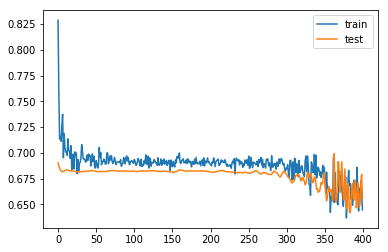

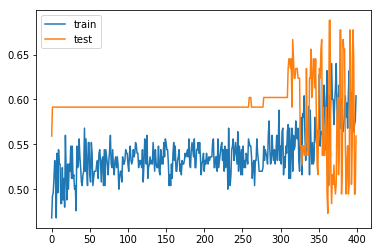

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D
from keras.layers import Dropout
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(40,input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Flatten())
model.add(Dense(25))
model.add(Dropout(0.8))
model.add(Dense(25))
model.add(Dropout(0.8))

model.add(Dense(25))
model.add(Dropout(0.8))

model.add(Dense(25))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# fit network
history = model.fit(train_X, train_y, epochs=400, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [26]:
from math import sqrt
from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

In [27]:
# for index, x in enumerate(yhat):
#     print (x, relevant_data['next_day_performance_vs_eth'][index+1])

yhat

array([[0.49673757],
       [0.51054734],
       [0.5158985 ],
       [0.5467053 ],
       [0.49586782],
       [0.49930847],
       [0.5605303 ],
       [0.4997024 ],
       [0.5220297 ],
       [0.49349362],
       [0.51972425],
       [0.5226459 ],
       [0.65598506],
       [0.44366717],
       [0.47510055],
       [0.5247988 ],
       [0.49292496],
       [0.42561126],
       [0.47363648],
       [0.5087279 ],
       [0.5140719 ],
       [0.5026876 ],
       [0.5106584 ],
       [0.52150774],
       [0.4873194 ],
       [0.56272876],
       [0.5444682 ],
       [0.51356477],
       [0.6199811 ],
       [0.5964851 ],
       [0.4152585 ],
       [0.577284  ],
       [0.73784757],
       [0.3611661 ],
       [0.99435836],
       [0.3080014 ],
       [0.3826151 ],
       [0.5807833 ],
       [0.56243217],
       [0.37835115],
       [0.73012644],
       [0.4788589 ],
       [0.31251112],
       [0.46961665],
       [0.5034885 ],
       [0.46187362],
       [0.5000184 ],
       [0.465

In [28]:
scores = model.evaluate(test_X, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 55.91%


In [29]:
history.history.keys()

dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])

In [30]:
model

In [47]:
class DataProcessing():
    
    def __init__(self):
        self.final_sets = {}   
        self.eval_sets = {}
        self.train_X = None
        self.test_X = None
        self.train_y = None
        self.test_y = None
        self.history = None
    
    def process_raw_dataset(self, csv_file, name):
        #get Eth dataset
        eth_dataset=read_csv('eth.csv', index_col=False)
        rename_columns('eth', eth_dataset)
        dataset=read_csv(csv_file, index_col=False)
        dataset.fillna(0, inplace=True)

        #plot graphs
        plot_timeseries_graphs(dataset, name)
        plot_timeseries_graphs(eth_dataset)

        valid_record_count = len(dataset) - get_shortest_feature(dataset)
        sliced_data = dataset.iloc[valid_record_count:]
        sliced_eth_data = slice_base_asset_data(eth_dataset,sliced_data,'eth_date')

        #sanity check sliced datasets are the same shape
        print('sliced eth data shape {}'.format(sliced_eth_data.shape))
        print('sliced {} data shape {}'.format(name, sliced_data.shape))
        merged_data = merge_frames(sliced_data,eth_dataset)

        #Plot Graphs
        plot_timeseries_graphs(merged_data)

        #remove 0's & NaN
        merged_data = replace_bad_values(merged_data)

        #Repeat Sanity Check for missing values
        print('NaN Cells: {}'.format(merged_data.isnull().values.sum()))

        #Repeat Sanity Check for 0 values
        print('Cells With a 0: {}'.format(merged_data.isin([0]).sum().sum()))
        merged_data.insert(5, 'price_percent_inrcease(USD)', np.nan, allow_duplicates=False)
        merged_data.insert(5, 'price_inrcease(USD)', np.nan, allow_duplicates=False)
        merged_data.insert(15, 'eth_price_percent_inrcease(USD)', np.nan, allow_duplicates=False)
        merged_data.insert(15, 'eth_percent_inrcease(USD)', np.nan, allow_duplicates=False)
        merged_data['performance_vs_eth'] = np.nan

        #generate difference from previous day's price
        merged_data['price_inrcease(USD)'] = merged_data['price(USD)'].diff()
        merged_data['eth_price_inrcease(USD)'] = merged_data['eth_price(USD)'].diff()

        #generate percentage difference from previous day's price
        merged_data['price_percent_inrcease(USD)'] = merged_data['price(USD)'].pct_change()
        merged_data['eth_price_percent_inrcease(USD)'] = merged_data['eth_price(USD)'].pct_change()

        #Fill labels column, uses the next days price data to infer the target for the current day
        merged_data['current_performance_vs_eth'] = generate_labels(merged_data)
        merged_data['next_day_performance_vs_eth'] = merged_data['current_performance_vs_eth'].shift(-1)

        print('{} outperformed ETH on {} / {} days'.format(name, merged_data['current_performance_vs_eth'].sum(), merged_data['current_performance_vs_eth'].count()))
        print(merged_data['current_performance_vs_eth'].sum() / merged_data['current_performance_vs_eth'].count() * 100,  '% of the time')

        #remove irrelevant columns
        relevant_data = merged_data.drop(['date','eth_generatedCoins','eth_averageDifficulty','eth_blockCount','eth_percent_inrcease(USD)','current_performance_vs_eth','performance_vs_eth'], axis =1)

        #remove the first row(due to missing data)
        relevant_data = relevant_data.drop(0)
        relevant_data = relevant_data.drop(1)

        relevant_data = relevant_data[:-1]

        # load dataset
        new_dataset = relevant_data
        values = new_dataset.values
        # integer encode direction
        encoder = LabelEncoder()
        values[:,4] = encoder.fit_transform(values[:,4])
        # ensure all data is float
        values = values.astype('float32')

        # normalize features
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled = scaler.fit_transform(values)
        # frame as supervised learning
        reframed = series_to_supervised(scaled, 1, 1)
        # drop columns we don't want to predict
        # reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
        # print(len(reframed))
        # print(len(relevant_data))
        reframed = reframed.drop(0)
        
        self.final_sets[name] = reframed 

        return "upload for {} complete".format(csv_file)
        
    def build_model(self):
        self.model = Sequential()
        self.model.add(LSTM(40,input_shape=(self.train_X.shape[1], self.train_X.shape[2])))
        # model.add(Flatten())
        self.model.add(Dense(25))
        self.model.add(Dropout(0.8))
        self.model.add(Dense(25))
        self.model.add(Dropout(0.8))

        self.model.add(Dense(25))
        self.model.add(Dropout(0.8))

        self.model.add(Dense(25))

        
        self.model.add(Dense(1, activation = 'sigmoid'))

        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            
        return "build complete"
    
    #use self.final_sets.get(rep) as the input variable
    def set_train_test_values(self, dataset, n_train_days=250):
            values = dataset.values
            train = values[:n_train_days, :]
            test = values[n_train_days:, :]

            # split into input and outputs
            self.train_X, self.train_y = train[:, :-1], train[:, -1]
            print(len(self.train_X), len(self.train_y))
            self.test_X, self.test_y = test[:, :-1], test[:, -1]
            print(len(self.test_X), len(self.test_y))

            # reshape input to be 3D [samples, timesteps, features]
            self.train_X = self.train_X.reshape((self.train_X.shape[0], 1, self.train_X.shape[1]))
            self.test_X = self.test_X.reshape((self.test_X.shape[0], 1, self.test_X.shape[1]))
            print(self.train_X.shape, self.train_y.shape, self.test_X.shape, self.test_y.shape)
            
    def set_eval_values(self, test_days=None):
        for erc20 in self.final_sets:
            
            values = self.final_sets.get(erc20).values
            days = len(values)
            if test_days == None:
                test_days = len(self.test_y)
        
            n_train_days = days - test_days 
            train = values[:n_train_days, :]
            test = values[n_train_days:, :]

            # split into input and outputs
            train_X, train_y = train[:, :-1], train[:, -1]
            print(len(train_X), len(train_y))
            test_X, test_y = test[:, :-1], test[:, -1]
            print(len(test_X), len(test_y))

            # reshape input to be 3D [samples, timesteps, features]
            self.eval_sets[erc20] = {'test_X' : test_X.reshape((test_X.shape[0], 1, test_X.shape[1])), 'test_y' : test_y} 
            print(self.eval_sets[erc20])
        
    def fit_model(self):        
        self.history = self.model.fit(self.train_X, self.train_y, epochs=400, batch_size=50, validation_data=(self.test_X, self.test_y), verbose=2, shuffle=False)
        # plot history
        pyplot.plot(self.history.history['loss'], label='train')
        pyplot.plot(self.history.history['val_loss'], label='test')
        pyplot.legend()
        pyplot.show()

        pyplot.plot(self.history.history['acc'], label='train')
        pyplot.plot(self.history.history['val_acc'], label='test')
        pyplot.legend()
        pyplot.show()



In [48]:
DataProcessing = DataProcessing()


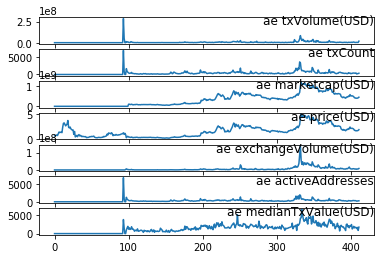

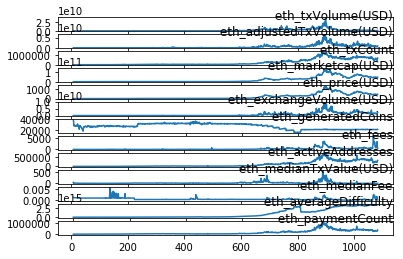

sliced eth data shape (312, 16)
sliced ae data shape (312, 8)


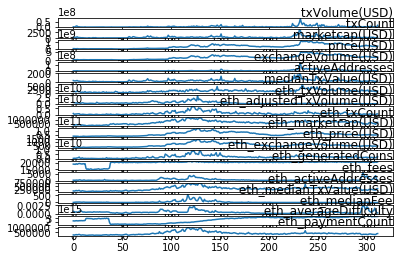

NaN Cells: 0
Cells With a 0: 0
ae outperformed ETH on 145 / 312 days
46.47435897435898 % of the time


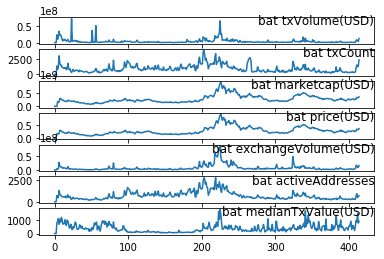

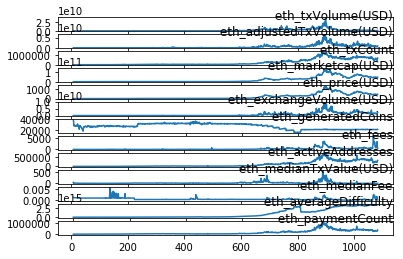

sliced eth data shape (411, 16)
sliced bat data shape (411, 8)


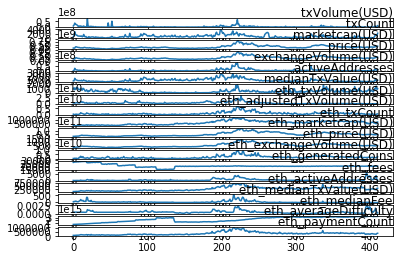

NaN Cells: 0
Cells With a 0: 0
bat outperformed ETH on 190 / 411 days
46.228710462287104 % of the time


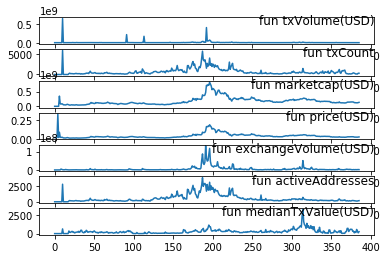

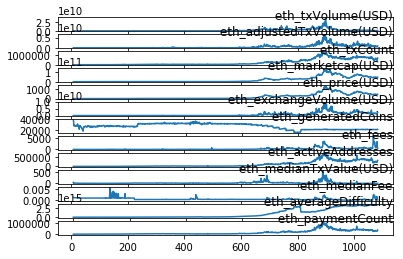

sliced eth data shape (369, 16)
sliced fun data shape (369, 8)


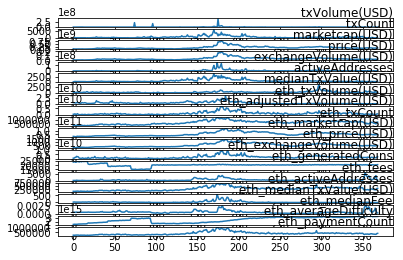

NaN Cells: 4
Cells With a 0: 0
fun outperformed ETH on 160 / 369 days
43.360433604336045 % of the time


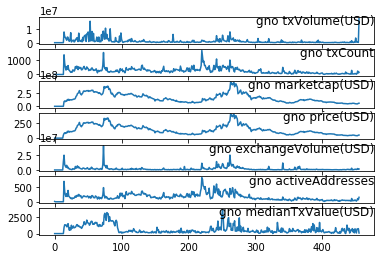

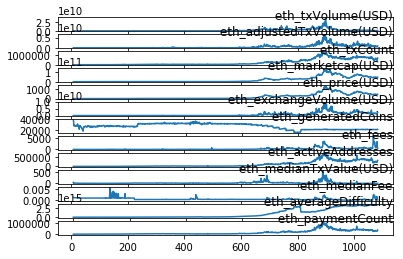

sliced eth data shape (441, 16)
sliced gno data shape (441, 8)


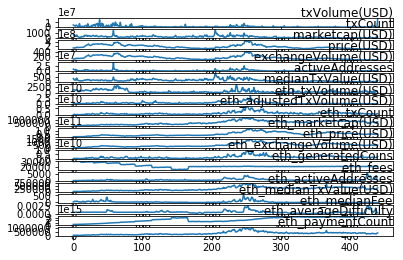

NaN Cells: 0
Cells With a 0: 0
gno outperformed ETH on 183 / 441 days
41.49659863945578 % of the time


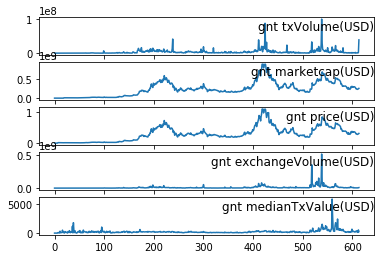

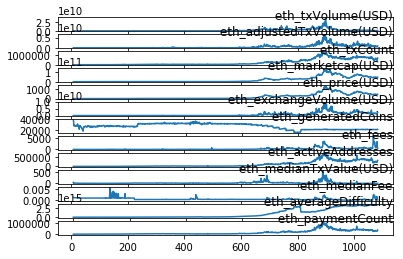

sliced eth data shape (595, 16)
sliced gnt data shape (595, 8)


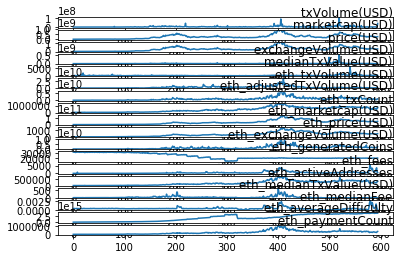

NaN Cells: 0
Cells With a 0: 0
gnt outperformed ETH on 257 / 595 days
43.19327731092437 % of the time


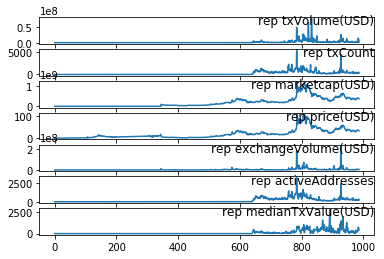

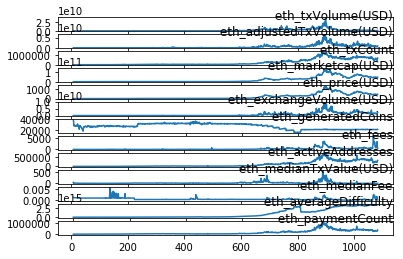

sliced eth data shape (346, 16)
sliced rep data shape (346, 8)


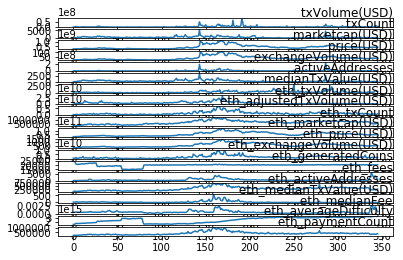

NaN Cells: 0
Cells With a 0: 0
rep outperformed ETH on 155 / 346 days
44.797687861271676 % of the time


In [49]:
erc20_sets=['ae','bat','fun','gno','gnt','rep']

for erc20 in erc20_sets:
    csv = erc20 + '.csv'
    DataProcessing.process_raw_dataset(csv, erc20)

In [50]:
DataProcessing.set_train_test_values(DataProcessing.final_sets.get('rep'))

250 250
92 92
(250, 1, 47) (250,) (92, 1, 47) (92,)


In [51]:
DataProcessing.set_eval_values()

499 499
92 92
{'test_X': array([[[0.05263978, 0.09797882, 0.38409138, ..., 0.2828998 ,
         0.65594095, 0.6754661 ]],

       [[0.01910382, 0.06881617, 0.38769847, ..., 0.30411863,
         0.69533354, 0.545497  ]],

       [[0.0443995 , 0.06554379, 0.3706049 , ..., 0.29708531,
         0.69600546, 0.57946736]],

       ...,

       [[0.00800721, 0.03282002, 0.25572163, ..., 0.21800758,
         0.6242074 , 0.60954803]],

       [[0.00863347, 0.03214629, 0.25158927, ..., 0.2042584 ,
         0.59972537, 0.6033244 ]],

       [[0.0052051 , 0.02743022, 0.25937527, ..., 0.29277882,
         0.7350632 , 0.63750225]]], dtype=float32), 'test_y': array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0